In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read in the data
cleaned = open("cleaned.txt", "r")
uncleaned = open("uncleaned.txt", "r")

prosScoreHeader = "Average pros score: "
consScoreHeader = "Average cons score: "
summaryScoreHeader = "Average summary score: "



In [202]:
# clean the data
companyCleaned = []

companyProsCleaned = []

companyConsCleaned = []

companyProConCleaned = []

companySummaryCleaned = []

companyStdDiv = []

while True:
    line = cleaned.readline()
    if line == "":
        break
    values = line.split("\t")
    companyCleaned.append(values[0])

    scoreValues = values[1]

    splitValues = scoreValues[scoreValues.index(prosScoreHeader):].split(",")
    currProsScore = splitValues[0][len(prosScoreHeader):]
    companyProsCleaned.append(float(currProsScore.strip()))

    splitValues = scoreValues[scoreValues.index(consScoreHeader):].split(",")
    currConsScore = splitValues[0][len(consScoreHeader):]
    companyConsCleaned.append(float(currConsScore.strip()))

    splitValues = scoreValues[scoreValues.index(summaryScoreHeader):].split(",")
    currSummaryScore = splitValues[0][len(summaryScoreHeader):]
    companySummaryCleaned.append(float(currSummaryScore.strip()))

    currProConAvg = (float(currProsScore.strip()) + float(currConsScore.strip())) / 2

    companyProConCleaned.append(currProConAvg)

    currStdDiv = np.std([float(currProsScore.strip()), float(currConsScore.strip()), float(currSummaryScore.strip())])
    companyStdDiv.append(currStdDiv)

print(companyCleaned)

print(companyProConCleaned)
# print(companyProsCleaned)
# print(companyConsCleaned)
print(companySummaryCleaned)


['Facebook', 'Accenture', 'Standard Charted ', 'Paypal', 'GovTech', 'DBS-Bank', 'HSBC-Bank', 'NCS', 'J-P-Morgan', 'Tesla', 'Microsoft', 'Dell Technologies', 'Google', 'Lenovo']
[2.19916142557652, 2.1986842105263156, 2.200075642965204, 2.21875, 2.3076923076923075, 2.0921052631578947, 2.20979020979021, 2.1127450980392157, 2.2549019607843137, 2.1965962441314555, 2.3, 2.247311827956989, 2.3057503506311363, 2.2592592592592595]
[2.190775681341719, 2.4513157894736843, 2.283661119515885, 2.33203125, 2.1538461538461537, 2.1008771929824563, 2.272727272727273, 2.0686274509803924, 2.337690631808279, 2.2922535211267605, 2.15, 2.629032258064516, 2.482468443197756, 2.1296296296296298]


In [203]:
zipped = list(zip(companyCleaned, companyProsCleaned, companyConsCleaned, companySummaryCleaned))

sorted_zip = sorted(zipped, key=lambda x: x[3])

companyCleaned, companyProsCleaned, companyConsCleaned, companySummaryCleaned = zip(*sorted_zip)



0.15547698386323408


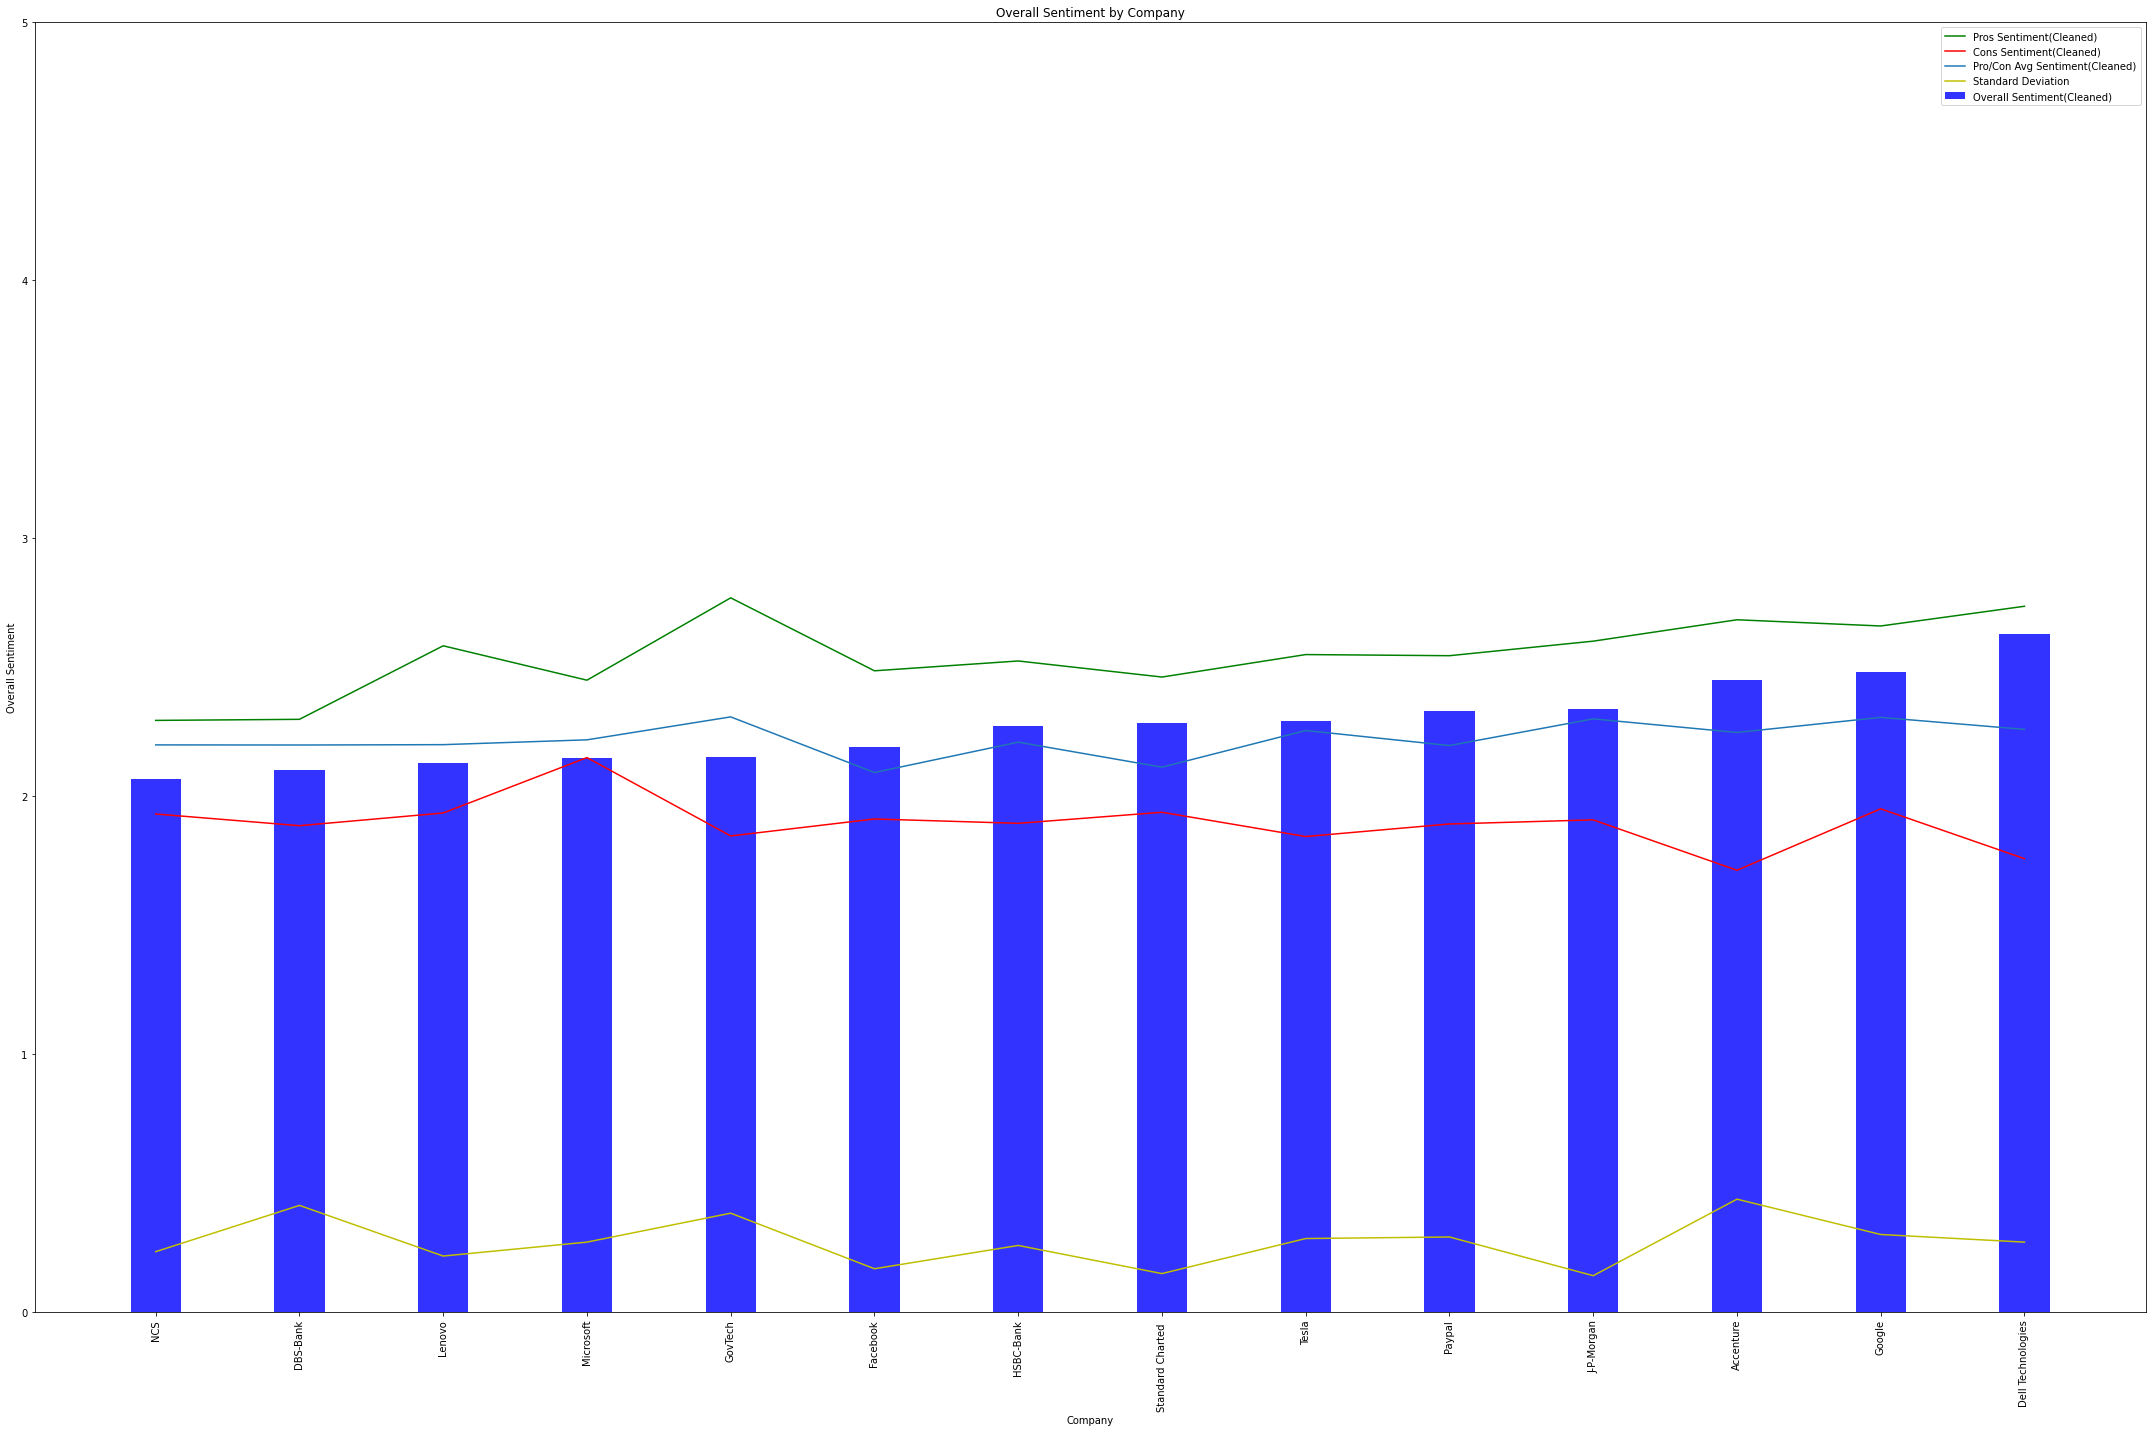

In [204]:
n_groups = len(companyCleaned)

fig, ax = plt.subplots( figsize=(15,10))

index = np.arange(n_groups)

bar_width = 0.35

opacity = 0.8

rects2 = plt.bar(index, companySummaryCleaned, bar_width,
alpha=opacity,
color='b',
label='Overall Sentiment(Cleaned)')

prosLineCleaned = plt.plot(companyProsCleaned, color='g', label='Pros Sentiment(Cleaned)')
consLineCleaned = plt.plot(companyConsCleaned, color='r', label='Cons Sentiment(Cleaned)')

proConAvgLineCleaned = plt.plot(companyProConCleaned, label='Pro/Con Avg Sentiment(Cleaned)')

stdDivLine = plt.plot(companyStdDiv, color='y', label='Standard Deviation')

print(np.std(companySummaryCleaned))

plt.xlabel('Company')

plt.ylabel('Overall Sentiment')

plt.ylim(0, 5)

plt.title('Overall Sentiment by Company')

plt.xticks(index, companyCleaned, rotation=90)

plt.legend()

plt.tight_layout()


plt.show()